# <u>Data, Metadata and APIs</u>
# <u>Part 2: Photo Filter Review (Modifying Data)</u>

Now that we know how bitmap uses bytes to encode image data, we can have some fun by manipulating those bytes. The results look like the types of filters you might apply to your photographs on Instagram, Snapchat, etc. We did this same thing first semester with HTML/JavaScript.

### <u>Taking an Image File as Input</u>

We first start by writing the bytes of _flowers.bmp_ to a byte array named *original_bytes*. In this case, _flowers.bmp_ is the **input** for our algorithm:

In [1]:
# Create a byte array from the binary data in flowers.bmp
with open("flowers.bmp", 'rb') as original_image:
    original_data = original_image.read()
    original_bytes = bytearray(original_data)

It looks like nothing happened, but the image data is currently stored in the variable *original_bytes*, just waiting to be modified. Just in case you forgot from yesterday, here's what this image looks like:

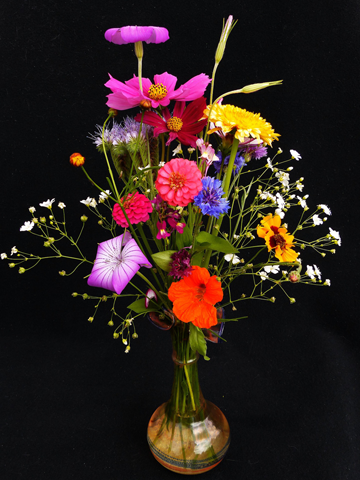

In [2]:
# Display flowers.bmp
    
from PIL import Image
img = Image.open("flowers.bmp")
img.save("output/flowers.png",'png')

from IPython.display import Image
Image(filename="output/flowers.png")

### <u>Abstraction to Manage the Complexity of your Algorithm</u>

One example of abstraction is giving a name to an algorithm (defining a function). For example, think about when your parents say, "Clean your room!" This is actually an abstraction for a multistep procedure: "Make your bed, fold & put away your laundry, throw away any garbage that is on your desk/floor, and return any dirty dishes to the kitchen." In pseudocode:

def clean_room():

    make_bed()
    
    fold_laundry()
    
    throw_away_garbage()
    
    return_dishes()
    
The benefit of *defining clean_room()* is that if you need to refer to these steps in future algorithms, you just have to write *clean_room()* instead of having to write a lot of additional code: *make_bed()*, *fold_laundry()*, *throw_away_garbage()*, and *return_dishes()*.

That is, **abstraction** allows us to _manage the complexity of a program_.

Here are three functions that we will use to help manage the complexity of our program.

##### <u>Abstraction 1: A function that creates a list of pixels from the bytes of the .bmp file</u>

We will use the function *bitmap\_to\_pixels(byte\_array)* any time we want to convert a new _.bmp_ file to a list of RGB pixels:

In [3]:
# Summary: Reads a bitmap byte array and return the file header and a list of pixels (RGB triples)
# Parameters: A byte array from a bitmap
# Return: A tuple in the form of (header, RGB triples list)

def bitmap_to_pixels(byte_array):
    pixels_list = []  
    length_of_image_bytes = len(byte_array) - 54 # Read after the 54th byte
    number_of_pixels = length_of_image_bytes//3 # There are 3 bytes per pixel
    header = byte_array[:54] # This is where the metadata is stored
    for i in range(number_of_pixels): 
        b = byte_array[54 + 3*i] # Read the blue byte the starts right after the header, and assign this value to 'b'
        g = byte_array[54 + 3*i + 1] # Read the green byte the starts right after the blue byte, and assign this value to 'g'
        r = byte_array[54 + 3*i + 2] # Read the red byte the starts right after the header, and assign this value to 'r'
        pixel = [r,g,b] # Store the three channels as an RGB list named 'pixel'
        pixels_list.append(pixel) # Append 'pixel' to pixel list
    return header, pixels_list # Return the file header (metadata) and list of pixels (data) as a tuple

##### <u>Abstraction 2: A function that takes a list of pixels and converts it to the bytes of a .bmp file </u>

This function, *pixels\_to\_bitmap(header, pixel\_list)*, goes in the opposite direction. It takes a file header and a list of pixels to create a bitmap byte array:

In [4]:
# Summary: Reads a file header and list of pixels (RGB triples) and returns a bitmap byte array
# Parameters: The 1st parameter is the bitmap file header and the 2nd parameter is a list of pixels (RGB triples)
# Return: A bitmap byte array

def pixels_to_bitmap(header,pixel_list):
    byte_array = header
    number_of_pixels = len(pixel_list)
    for i in range(number_of_pixels):
        r, g, b = pixel_list[i][0], pixel_list[i][1], pixel_list[i][2]
        byte_array.append(b)
        byte_array.append(g)
        byte_array.append(r)
    return byte_array

##### <u>Abstraction 3: A function that writes out the bytes to a new .bmp file</u>

This final function, *file_writer(byte_array, new_file_name)* allows you to create a bitmap (.bmp) file from a bitmap byte array. It will save it to whatever directory you have this notebook saved in. This function allows us to create a _.bmp_ file as output.

In [5]:
# Summary: Saves a bitmap byte array as a .bmp file with the specified filename
# Parameters: The 1st parameter is the bitmap byte array and the 2nd parameter is a string (such as 'myfile.bmp')
# Return: Technically none, but this function does write out your bitmap file

def file_writer(byte_array, new_file_name):
    full_name = new_file_name
    new_file = open(new_file_name, 'wb')
    new_file.write(byte_array)
    new_file.close()

### <u>Image Filter \#1: Turning 'Very Dark Pixels' to White</u>

A pixel is "very dark" if is is a triple of the form [x, y, z] where x < 30, y < 30, and z < 30. Let's turn these pixels white:

In [6]:
header, pixel_list = bitmap_to_pixels(original_bytes) # Gather header and pixel list

new_pixel_list = []

for pixel in pixel_list: # Loop through every pixel
    new_pixel = pixel # Copy the original pixel
    if pixel[0] < 30 and pixel[1] < 30 and pixel[2] < 30: # Check if R<30, G<30, B<30
        new_pixel = [255, 255, 255] # Overwrite the original pixel saved
    new_pixel_list.append(new_pixel) # Add to list
        
new_file = pixels_to_bitmap(header, new_pixel_list) # Put file back together!

file_writer(new_file,"output/flowers_white_background.bmp") # Save the image in an output file

Let's take a look:

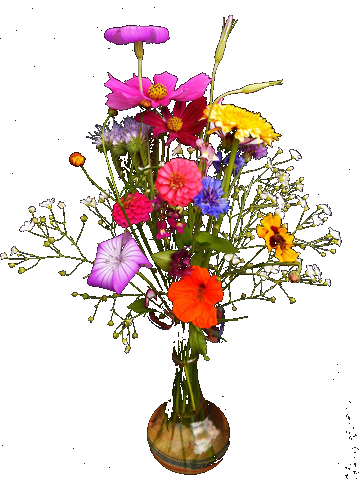

In [7]:
from PIL import Image
img = Image.open("output/flowers_white_background.bmp")
img.save("output/flowers_white_background.png",'png')

from IPython.display import Image
Image(filename="output/flowers_white_background.png")

Not a bad result for just a few lines of code! 

### <u>Image Filter \#1 as an Abstraction</u>

We can encapsulate the entire image filter procedure into a function:

In [8]:
def very_dark_to_white(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # image filter code goes in this section ############
        #####################################################
        if pixel[0] < 30 and pixel[1] < 30 and pixel[2] < 30:
            new_pixel = [255, 255, 255]
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_white_background.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

This function is an abstraction because *very\_dark\_to\_white(file\_name)* takes a _.bmp_ file as input, writes it into an array of bytes, converts the bytes to a list of RGB pixels, applies the filter, converts the pixels back to bytes, then writes the file out as a new bitmap file. That's a lot of steps!

A function like is **an abstraction that manages the complexity of a program**, because applying this procedure to another file is now a piece of cake. Let's try. Start with a new image with a lot of "very dark" pixels:

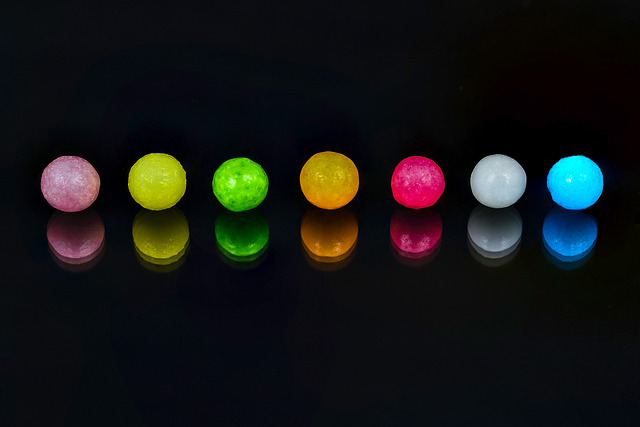

In [9]:
# Image Source: https://pixabay.com/en/nonpareils-balls-beads-sweetness-3128506/

from PIL import Image
img = Image.open("candy.bmp")
img.save("output/candy.png",'png')

from IPython.display import Image
Image(filename="output/candy.png")


Now apply the filter:

In [10]:
very_dark_to_white('candy.bmp')

'output/candy_white_background.bmp'

A complicated, multi-step procedure only required us to write a single line of code. 

Now view the result:

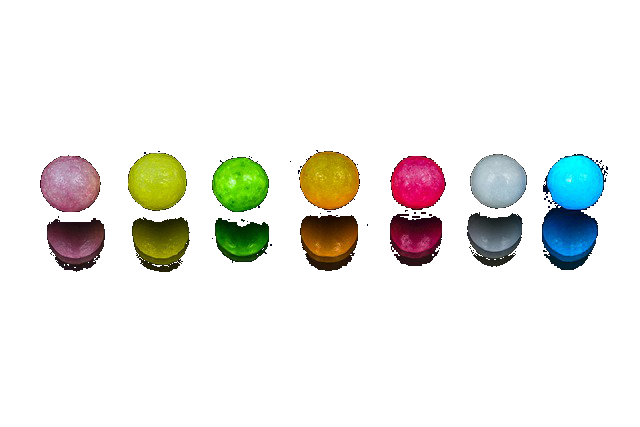

In [11]:
from PIL import Image
img = Image.open("output/candy_white_background.bmp")
img.save("output/candy_white_background.png",'png')

from IPython.display import Image
Image(filename="output/candy_white_background.png")

### <u>Image Filter \#2: Monochrome Red</u>

Now that you have the framework for an image filter, you don't need to write much code to create a "Monochrome Red" filter. 

The filter needs to zero out all of the color information except for red:

In [12]:
def red_monochrome(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # image filter code goes in this section ############
        #####################################################
        new_pixel[1] = 0 # set the green channel to 0
        new_pixel[2] = 0 # set the blue channel to 0
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_red_monochrome.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

Apply the filter to the flower picture:

In [13]:
red_monochrome("flowers.bmp")

'output/flowers_red_monochrome.bmp'

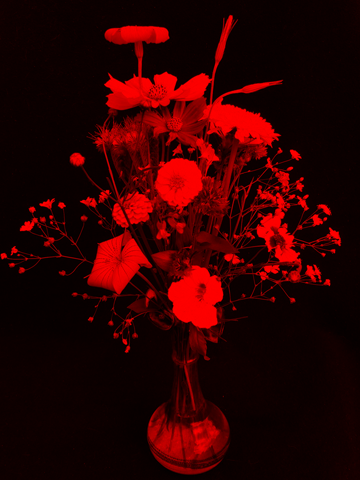

In [14]:
from PIL import Image
img = Image.open("output/flowers_red_monochrome.bmp")
img.save("output/flowers_red_monochrome.png",'png')

from IPython.display import Image
Image(filename="output/flowers_red_monochrome.png")

It looks like a bouquet of flowers in an old photography darkroom.

### <u>Task #1: Grayscale (Black and White) Filter</u>

Create a grayscale (black and white) filter. Display your results and explain how your code works.

*Hint: Pure gray requires all three color channels to have the same value. Also, your filter must be in the form of a function.*

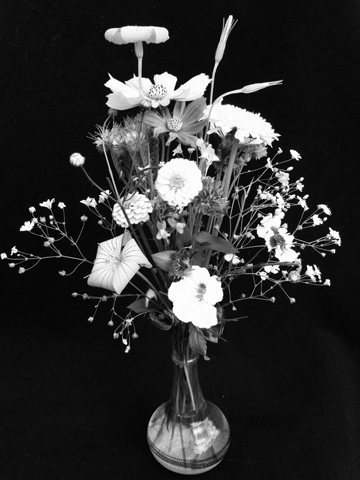

In [15]:
# Your code here
def very_dark_and_white(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
     
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # image filter code goes in this section ############
        #####################################################
        x = new_pixel[0]
        new_pixel[1] = x # set the green channel to 0
        new_pixel[2] = x # set the blue channel to 0
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_very_dark_and_white.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

very_dark_and_white("flowers.bmp")

from PIL import Image
img = Image.open("output/flowers_very_dark_and_white.bmp")
img.save("output/flowers_very_dark_and_white.png",'png')

from IPython.display import Image
Image(filename="output/flowers_very_dark_and_white.png")

### <u>Task #2: Mystery Filter</u>

Below is some code to insert into a function, *mystery_filter(file_name)*. Based on what you see in the code, what do you think it will do to the image? Explain, and also test your hypothesis on *red1.bmp* and *red2.bmp*.

**<u>Your Answer:</u>**


Here is the code you need to create your mystery filter:

In [16]:
        #####################################################
        # Image filter code to insert into function #########
        #####################################################
        if not (pixel[0] > 120 and pixel[1] < 80 and pixel[2] < 80):
            average = (pixel[0]+pixel[1]+pixel[2])//3
            new_pixel[0] = average    
            new_pixel[1] = average
            new_pixel[2] = average
        #####################################################

Next, here is *red1.bmp*, one of the pictures to which you must apply your mystery filter:

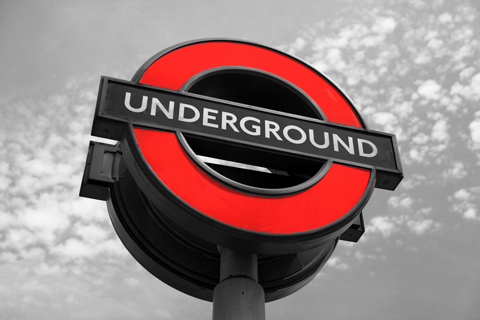

In [17]:
def MysteryMK1(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # Image filter code to insert into function #########
        #####################################################
        if not (pixel[0] > 120 and pixel[1] < 80 and pixel[2] < 80):
            average = (pixel[0]+pixel[1]+pixel[2])//3
            new_pixel[0] = average    
            new_pixel[1] = average
            new_pixel[2] = average
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_MysteryMK1.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

MysteryMK1("red1.bmp")


# Here is red1.bmp:

from PIL import Image
img = Image.open("output/red1_MysteryMK1.bmp")
img.save("output/red1.png",'png')

from IPython.display import Image
Image(filename="output/red1.png")

Finally, here is *red2.bmp*, the other picture to which you must apply your mystery filter:

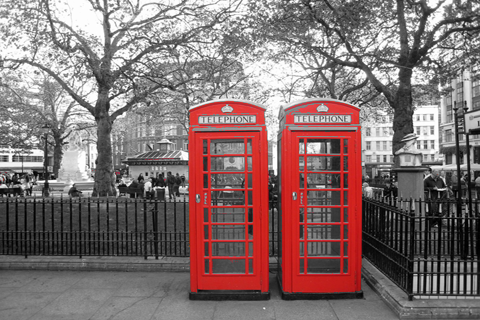

In [18]:
def MysteryMK2(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # Image filter code to insert into function #########
        #####################################################
        if not (pixel[0] > 120 and pixel[1] < 80 and pixel[2] < 80):
            average = (pixel[0]+pixel[1]+pixel[2])//3
            new_pixel[0] = average    
            new_pixel[1] = average
            new_pixel[2] = average
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_MysteryMK2.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

MysteryMK2("red2.bmp")


# Here is red1.bmp:

from PIL import Image
img = Image.open("output/red2_MysteryMK2.bmp")
img.save("output/red2_MysteryMK2.png",'png')

from IPython.display import Image
Image(filename="output/red2_MysteryMK2.png")

### <u>Task #3: The Secret Message</u>

Hidden in this bitmap's red noise is a secret message. Find it!

*Hint: Many of you solved this puzzle during first semester. You can look back at old code if you'd like, but this time solve it using Python.*

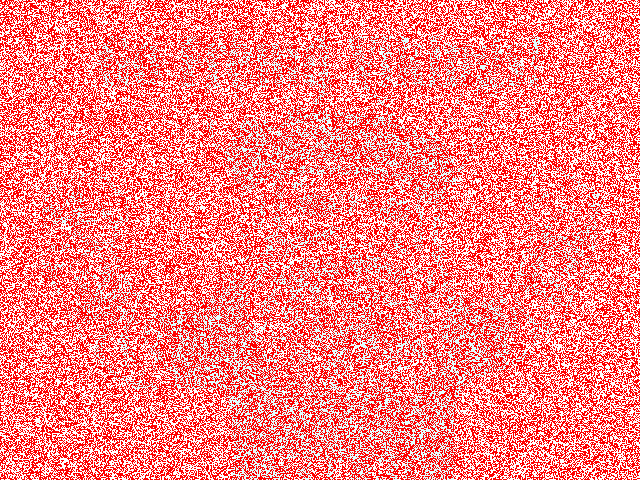

In [19]:
from PIL import Image
img = Image.open("clue.bmp")
img.save("output/clue.png",'png')

from IPython.display import Image
Image(filename="output/clue.png")

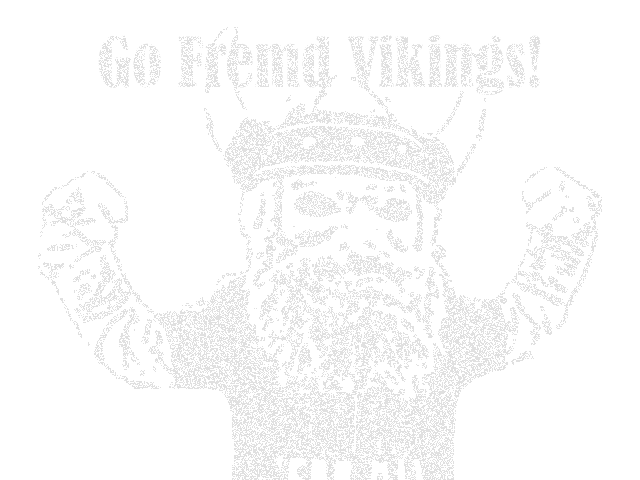

In [20]:
def reveal(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # image filter code goes in this section ############
        #####################################################
        x = new_pixel[0]
        new_pixel[1] = x # set the green channel to 0
        new_pixel[2] = x # set the blue channel to 0
        #####################################################
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_reveal.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

reveal("clue.bmp")

from PIL import Image
img = Image.open("output/clue_reveal.bmp")
img.save("output/clue_reveal.png",'png')

from IPython.display import Image
Image(filename="output/clue_reveal.png")

What is the secret message, and how did you find it?

**<u>Your Answer: Red Scaling the entire photo.</u>**

### <u>Task #4: The French-to-Irish Filter</u>

Here's a French flag. Write a filter that transforms it into an Irish flag. 

*Hint: You may want to write some code to find out the RGB values of the three colors in this flag. Your filter must be in the form of a function.*

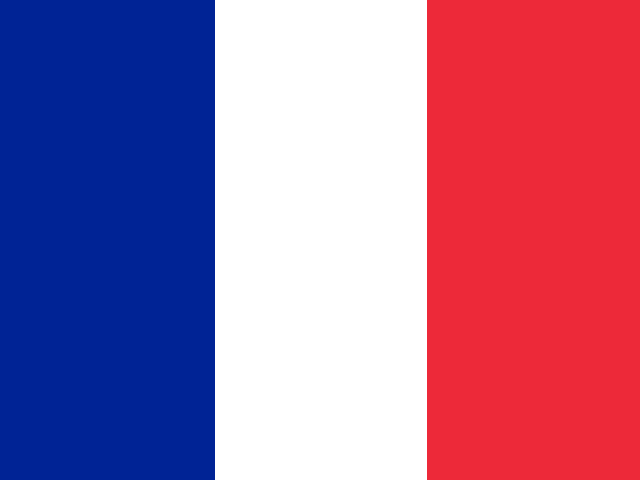

In [21]:
from PIL import Image
img = Image.open("france.bmp")
img.save("output/france.png",'png')

from IPython.display import Image
Image(filename="output/france.png")


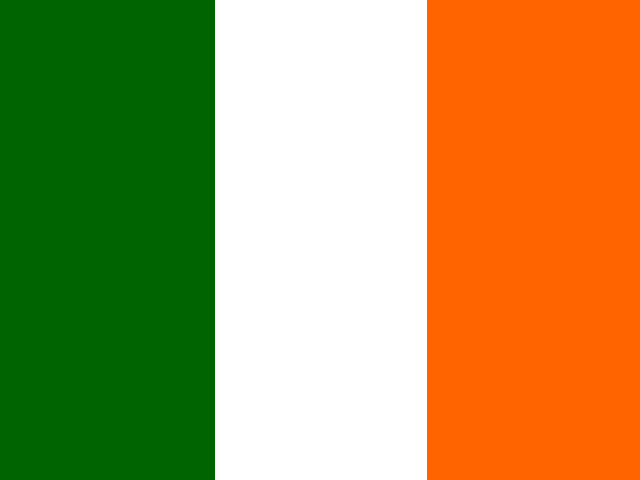

In [22]:
# Your code here
def Yellowizer(file_name):
   
    with open(file_name, 'rb') as original_image:
        original_data = original_image.read()
        original_bytes = bytearray(original_data)
    
    header, pixel_list = bitmap_to_pixels(original_bytes)
    
    new_pixel_list = []
    
    for pixel in pixel_list:
        
        new_pixel = pixel
        
        #####################################################
        # Image filter code to insert into function #########
        #####################################################
        if(pixel[2] > 120 and pixel[0] < 100):
            new_pixel[0] = 0
            new_pixel[1] = 100
            new_pixel[2] = 0
            
        if(pixel[0] > 120 and pixel[2] < 100):
            new_pixel[0] = 255
            new_pixel[1] = 100
            new_pixel[2] = 0
        #####################################################
        
        new_pixel_list.append(new_pixel)        
    
    new_file = pixels_to_bitmap(header, new_pixel_list)

    original_file_name = file_name.split('.')[0]
    
    new_file_name = 'output/' + original_file_name + '_Yellowizer.bmp'
    
    file_writer(new_file,new_file_name)
    
    return new_file_name

Yellowizer("france.bmp")

from PIL import Image
img = Image.open("output/france_Yellowizer.bmp")
img.save("output/france_Yellowizer.png",'png')

from IPython.display import Image
Image(filename="output/france_Yellowizer.png")

### <u>Task #5: Exploring Types of Output</u>

Run the following code cell below. Then explain what the code does and why it is useful.

*Hint: If you run the cell but can't tell what it did, look in the folder where this notebook is located. You might find something interesting.*

**<u>Your Answer: It basically resets all pixel values. This is going to be very useful in terms of trying to find the true image if it's under a filter. Usually can be use in Forensics and other Law enforcement.</u>**

In [23]:
output_string = """
<html>
<head>
<style>
    body {
        background-color: #BBBBBB; 
        text-align: center;        
    }
</style>
<script>
    function changePic(){
        document.getElementById('idPic').src = 'flowers.bmp';
        document.getElementById('idHeader').innerHTML = 'Original Image:';
        document.body.style.backgroundColor = '#FFAA00';
    }
</script>

</head>

<body>
<h1 id='idHeader'>Filtered Image:</h1>
"""

output_string += "<img id='idPic' src='" + red_monochrome("flowers.bmp") + "'>"

output_string += """

<br>
<input type='button' value='View Original' onClick=changePic()>

</body>
</html>
"""

html_file= open("writeout.html","w")
html_file.write(output_string)
html_file.close()